#1. Carga del conjunto de datos


In [1]:
# imports
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [63]:
data = pd.read_csv("/content/drive/MyDrive/Tipologia/players_info.csv", sep=";", quotechar = "'")
data.head()

,equipo,jugador,date,dayofweek,comp,round,venue,result,squad,opponent,...,passes_completed,passes,passes_pct,progressive_passes,carries,progressive_carries,dribbles_completed,dribbles,match_report,Unnamed: 40
0,Alavés,Luis Rioja,2021-08-14,Sáb,La Liga,Semana 1 de partido,Local,D 1–4,Alavés,Real Madrid,...,12.0,16.0,75.0,0.0,20.0,4.0,1.0,1.0,Informe del partido,NaN
1,Alavés,Luis Rioja,2021-08-21,Sáb,La Liga,Semana 2 de partido,Local,D 0–1,Alavés,Mallorca,...,12.0,25.0,48.0,0.0,27.0,8.0,2.0,3.0,Informe del partido,NaN
2,Alavés,Luis Rioja,2021-08-27,Vie,La Liga,Semana 3 de partido,Visitante,D 0–3,Alavés,Valencia,...,15.0,22.0,68.2,2.0,22.0,4.0,2.0,4.0,Informe del partido,NaN
3,Alavés,Luis Rioja,2021-09-18,Sáb,La Liga,Semana 5 de partido,Local,D 0–2,Alavés,Osasuna,...,19.0,37.0,51.4,1.0,36.0,3.0,2.0,6.0,Informe del partido,NaN
4,Alavés,Luis Rioja,2021-09-22,Mié,La Liga,Semana 6 de partido,Visitante,D 0–1,Alavés,Espanyol,...,30.0,42.0,71.4,1.0,41.0,12.0,3.0,4.0,Informe del partido,NaN


#2. Descripcion del Dataset

In [5]:
print("Disponemos de {} variables con un total de {} muestras\nLos nombres de las variables son: {}"
      .format(len(data.columns), len(data), data.columns))
data.describe()

Disponemos de 41 variables con un total de 20460 muestras
Los nombres de las variables son: Index(['equipo', 'jugador', 'date', 'dayofweek', 'comp', 'round', 'venue',
       'result', 'squad', 'opponent', 'game_started', 'position', 'minutes',
       'goals', 'assists', 'pens_made', 'pens_att', 'shots_total',
       'shots_on_target', 'cards_yellow', 'cards_red', 'touches', 'pressures',
       'tackles', 'interceptions', 'blocks', 'xg', 'npxg', 'xa', 'sca', 'gca',
       'passes_completed', 'passes', 'passes_pct', 'progressive_passes',
       'carries', 'progressive_carries', 'dribbles_completed', 'dribbles',
       'match_report', 'Unnamed: 40'],
      dtype='object')


,minutes,goals,assists,pens_made,pens_att,shots_total,shots_on_target,cards_yellow,cards_red,touches,...,gca,passes_completed,passes,passes_pct,progressive_passes,carries,progressive_carries,dribbles_completed,dribbles,Unnamed: 40
count,13639.000000,13661.000000,13627.000000,13661.000000,13661.000000,13320.000000,13320.000000,13661.000000,13661.000000,10415.000000,...,10415.000000,10415.000000,10415.000000,10313.000000,10415.000000,10415.000000,10415.000000,10415.000000,10415.000000,0.0
mean,64.447174,0.090916,0.059661,0.009443,0.012005,0.802703,0.265541,0.155040,0.007906,37.713010,...,0.128757,23.976476,30.346135,75.760070,1.937302,23.419683,2.495727,0.540663,0.998656,NaN
std,30.928286,0.325703,0.254491,0.101158,0.113519,1.169523,0.597174,0.370946,0.088565,24.038665,...,0.395424,19.079643,21.709858,16.370852,2.301586,17.132737,2.942826,0.970396,1.510922,NaN
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,...,0.000000,9.000000,13.000000,66.700000,0.000000,10.000000,0.000000,0.000000,0.000000,NaN
50%,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,...,0.000000,20.000000,27.000000,78.300000,1.000000,20.000000,2.000000,0.000000,0.000000,NaN
75%,90.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,53.500000,...,0.000000,34.000000,43.000000,86.700000,3.000000,33.000000,4.000000,1.000000,1.000000,NaN
max,120.000000,4.000000,2.000000,2.000000,2.000000,10.000000,6.000000,2.000000,1.000000,161.000000,...,4.000000,143.000000,150.000000,100.000000,22.000000,133.000000,32.000000,10.000000,17.000000,NaN


#3. Exploracion de los datos

##3.1 Tipos de datos

In [19]:
data.dtypes

equipo                         object
jugador                        object
date                   datetime64[ns]
dayofweek                      object
comp                           object
round                          object
venue                          object
result                         object
squad                          object
opponent                       object
game_started                   object
position                       object
minutes                       float64
goals                         float64
assists                       float64
pens_made                     float64
pens_att                      float64
shots_total                   float64
shots_on_target               float64
cards_yellow                  float64
cards_red                     float64
touches                       float64
pressures                     float64
tackles                       float64
interceptions                 float64
blocks                        float64
xg          

Vemos que varios tipos de datos estan mal seteados, asi que procedemos a modificarlo.

In [64]:
change_columns = ['date']
for col in change_columns:
  data[col] = pd.to_datetime(data[col])

## 3.1 Valores vácios

In [65]:
data.isna().sum()

equipo                     0
jugador                    0
date                    1455
dayofweek               1455
comp                    1455
round                   1455
venue                   1455
result                  1455
squad                   1455
opponent                1455
game_started            1455
position                7772
minutes                 6821
goals                   6799
assists                 6833
pens_made               6799
pens_att                6799
shots_total             7140
shots_on_target         7140
cards_yellow            6799
cards_red               6799
touches                10045
pressures              10045
tackles                10045
interceptions           7140
blocks                 10045
xg                     10045
npxg                   10045
xa                     10045
sca                    10045
gca                    10045
passes_completed       10045
passes                 10045
passes_pct             10147
progressive_pa

Vemos que se ha producido un error al cargar el CSV y se ha generado una columna extra, 'Unname:40', así que procedemos a eliminarla. También eliminamos la columna 'match_report', que es un dato extraido de más.


In [66]:
data = data.drop(['Unnamed: 40', 'match_report'], axis=1)

Por otro lado, podemos observar que hay mucho valores vacios en los siguientes campos:


*   <b>Date</b>. Estas filas estan compltamente vacías, con lo que procedemos a eliminarlas
*   <b>Position</b>. Estos valores corresponden a dos grupos, si el jugador a participado en el encuentro pero en una posicion no soportado en lo datos, mientras que si el jugador no ha disputado ningun minuto, al no haber participado en el encuentro, su posicion está vacía. Para el primer caso, vamos completar el campo con el valor UNK, para indica que es deconocida, mientras que en el segundo caso lo compltaremos con null.
*    El resto de valores son de estadisticas que el jugador no ha podido completar por diferentes motivos (poco tiempo de juego, por posicion, ...), estos valores se van a sustituir por 0 para facilitar las estadisticas posteriores.



In [67]:
data.loc[(data['position'].isna()) & ~(data['minutes'].isna()), 'position']
# borrado de las filas vacias
data = data.drop(data.index[data['date'].isna()])
data.loc[data['position'].isna() & ~data['minutes'].isna(), 'position'] = 'UNK'
data.loc[data['position'].isna(), 'position'] = None
data.loc[data['goals'].isna() & ~data['minutes'].isna(), 'goals'] = 0
data.loc[data['assists'].isna() & ~data['minutes'].isna(), 'assists'] = 0
data.loc[data['pens_made'].isna() & ~data['minutes'].isna(), 'pens_made'] = 0
data.loc[data['pens_att'].isna() & ~data['minutes'].isna(), 'pens_att'] = 0
data.loc[data['shots_total'].isna() & ~data['minutes'].isna(), 'shots_total'] = 0
data.loc[data['shots_on_target'].isna() & ~data['minutes'].isna(), 'shots_on_target'] = 0
data.loc[data['cards_yellow'].isna() & ~data['minutes'].isna(), 'cards_yellow'] = 0
data.loc[data['cards_red'].isna() & ~data['minutes'].isna(), 'cards_red'] = 0
data.loc[data['touches'].isna() & ~data['minutes'].isna(), 'touches'] = 0
data.loc[data['pressures'].isna() & ~data['minutes'].isna(), 'pressures'] = 0
data.loc[data['tackles'].isna() & ~data['minutes'].isna(), 'tackles'] = 0
data.loc[data['interceptions'].isna() & ~data['minutes'].isna(), 'interceptions'] = 0
data.loc[data['blocks'].isna() & ~data['minutes'].isna(), 'blocks'] = 0
data.loc[data['xg'].isna() & ~data['minutes'].isna(), 'xg'] = 0
data.loc[data['npxg'].isna() & ~data['minutes'].isna(), 'npxg'] = 0
data.loc[data['xa'].isna() & ~data['minutes'].isna(), 'xa'] = 0
data.loc[data['sca'].isna() & ~data['minutes'].isna(), 'sca'] = 0
data.loc[data['gca'].isna() & ~data['minutes'].isna(), 'gca'] = 0
data.loc[data['passes_completed'].isna() & ~data['minutes'].isna(), 'passes_completed'] = 0
data.loc[data['passes'].isna() & ~data['minutes'].isna(), 'passes'] = 0
data.loc[data['passes_pct'].isna() & ~data['minutes'].isna(), 'passes_pct'] = 0
data.loc[data['progressive_passes'].isna() & ~data['minutes'].isna(), 'progressive_passes'] = 0
data.loc[data['carries'].isna() & ~data['minutes'].isna(), 'carries'] = 0
data.loc[data['progressive_carries'].isna() & ~data['minutes'].isna(), 'progressive_carries'] = 0
data.loc[data['dribbles_completed'].isna() & ~data['minutes'].isna(), 'dribbles_completed'] = 0
data.loc[data['dribbles'].isna() & ~data['minutes'].isna(), 'dribbles'] = 0

## 3.2 Valores átipicos
En este paso, para todas las variables númericas, vamos a buscar valores átipicos o extremos.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much

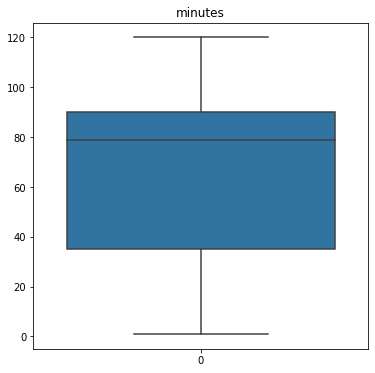

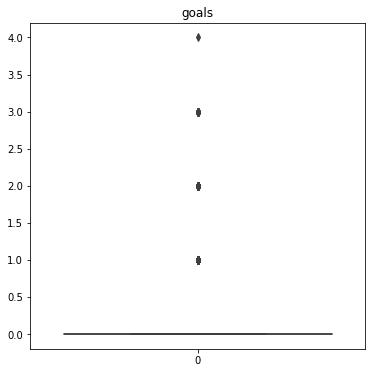

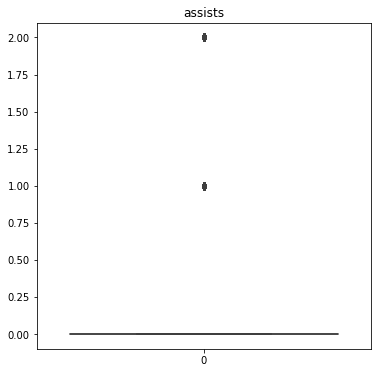

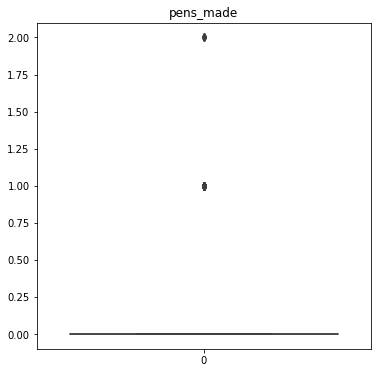

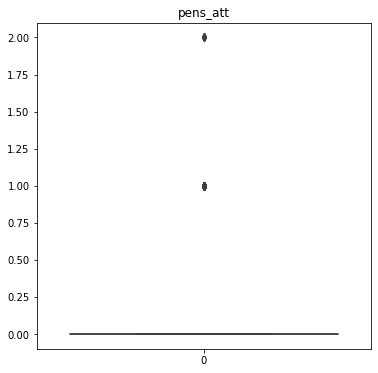

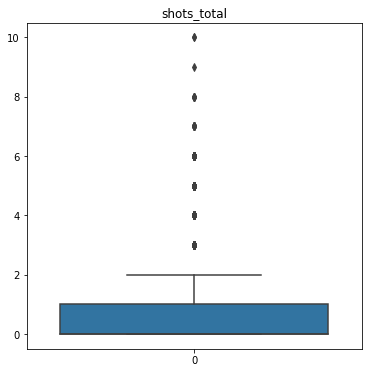

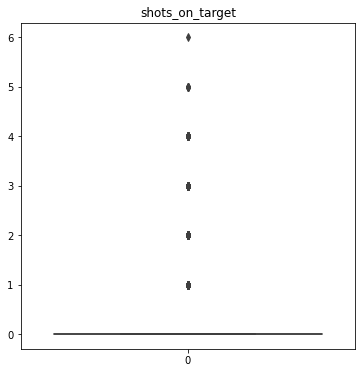

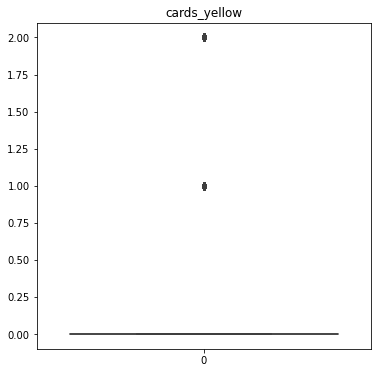

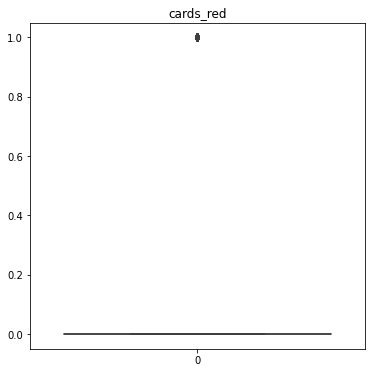

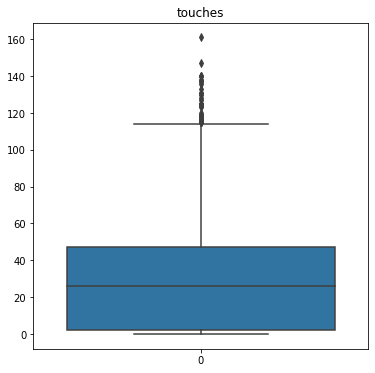

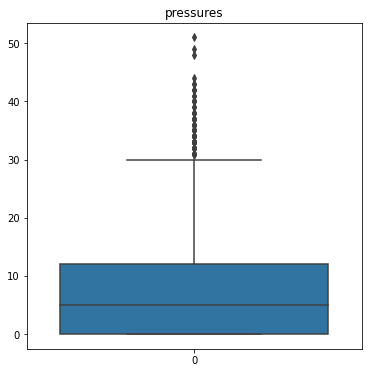

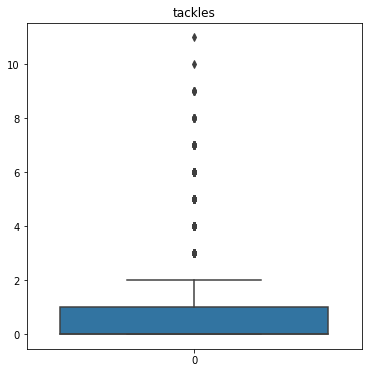

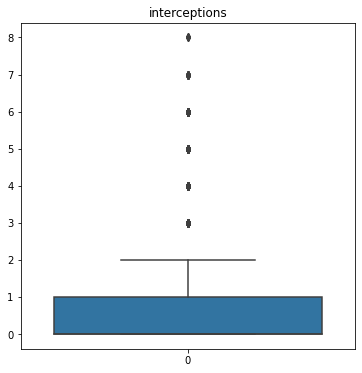

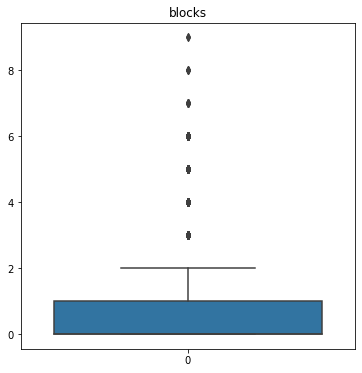

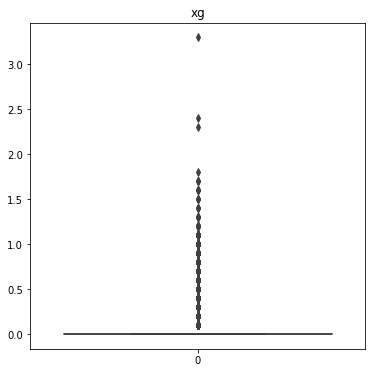

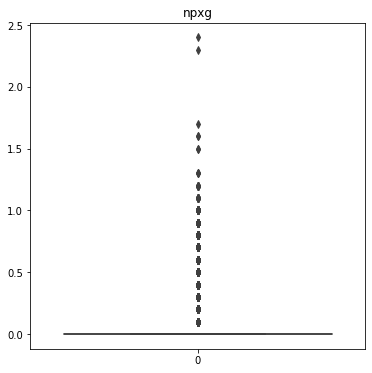

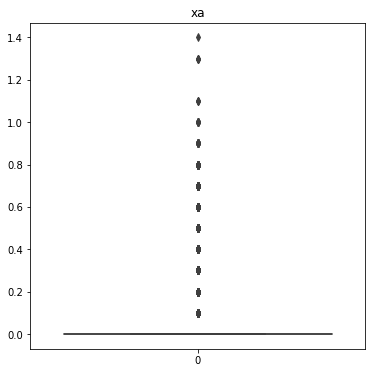

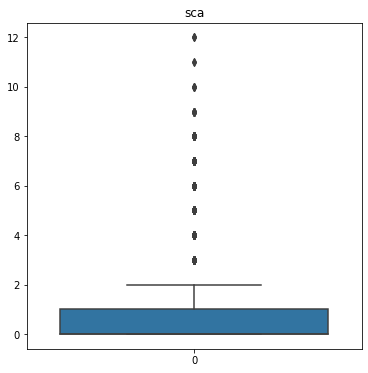

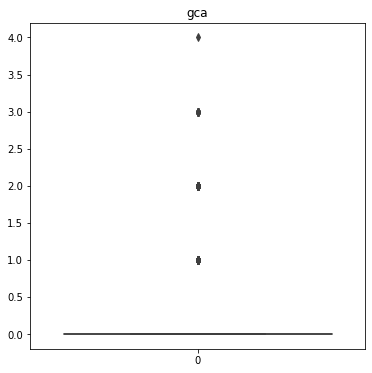

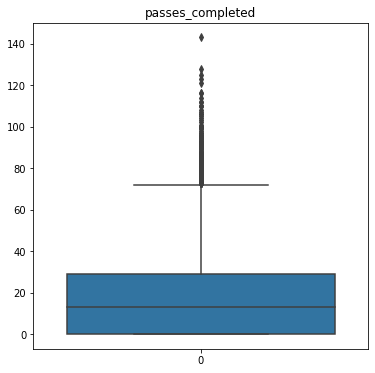

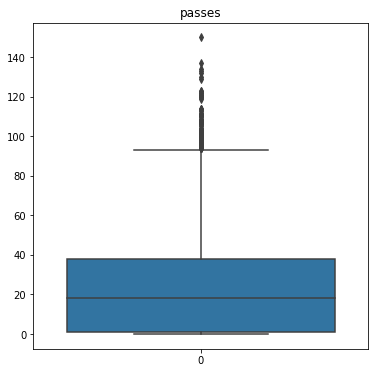

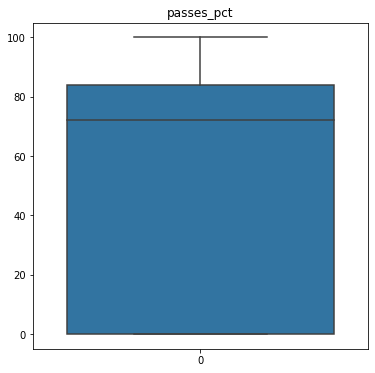

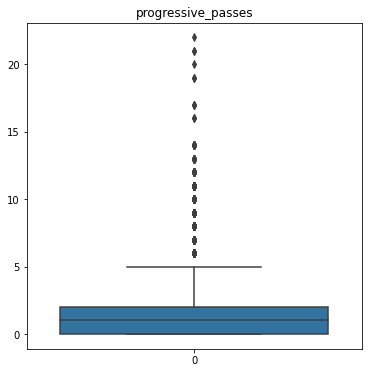

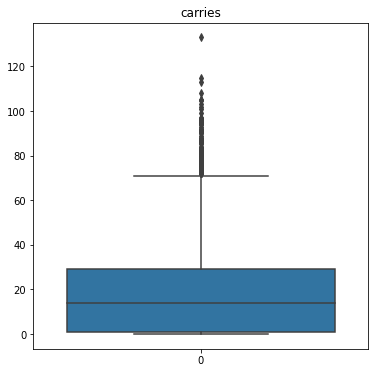

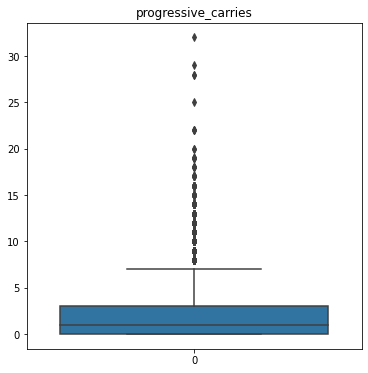

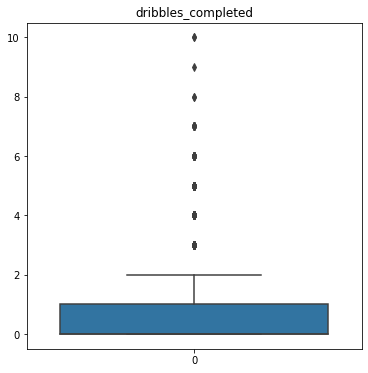

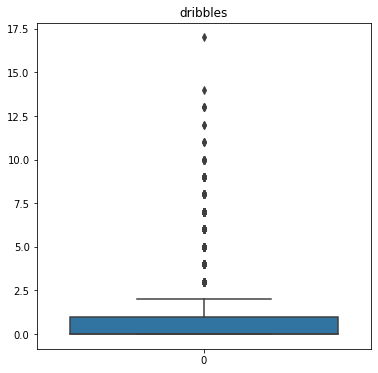

In [95]:
# sns.boxplot(data['minutes'])
names = ['minutes', 'goals', 'assists', 'pens_made', 'pens_att', 'shots_total', 'shots_on_target', 'cards_yellow', 'cards_red', 'touches', 'pressures', 'tackles', 'interceptions', 'blocks', 'xg', 'npxg', 'xa', 'sca', 'gca', 'passes_completed', 'passes', 'passes_pct', 'progressive_passes', 'carries', 'progressive_carries', 'dribbles_completed', 'dribbles']
for i in range(len(names)):
  fig, ax = plt.subplots(1, figsize=(6, 6), sharey=True)
  sns.boxplot(ax=ax, data=data[names[i]])
  ax.set_title(names[i])

En muchos campos vemos varios valores atípicos, pero analizando los datos, son valores que entran dentro de los posible, por eso se decide mantener dichos datos.